In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Carregar arquivo para um DataFrame
df_exames = pd.read_csv('./datasets/exame_diabetes.csv')

In [7]:
# Visualizar estrutura
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [8]:
# Apresentar as 10 primeiras linhas
df_exames.head(10)

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100
5,6,M,64,93,190,117
6,7,F,21,70,182,90
7,8,F,60,101,179,84
8,9,F,63,83,189,92
9,10,F,65,78,175,121


In [9]:
df_exames['genero'].unique()

array(['M', 'F'], dtype=object)

In [17]:
# Remover coluna id_paciente
df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)

In [12]:
df_exames.describe()

,idade,peso,altura,resultado
count,100.000000,100.00000,100.000000,100.00000
mean,46.370000,87.89000,173.230000,106.32000
std,15.912421,20.13936,13.088552,13.87526
min,20.000000,55.00000,150.000000,80.00000
25%,31.750000,71.00000,162.000000,95.00000
50%,45.000000,88.00000,175.000000,107.50000
75%,63.000000,105.25000,184.250000,117.25000
max,70.000000,120.00000,195.000000,130.00000


In [19]:
# converter uma variável categórica em numérica, usando One-Hot Encoding
df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')

In [21]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1
5,64,93,190,117,0,1
6,21,70,182,90,1,0
7,60,101,179,84,1,0
8,63,83,189,92,1,0
9,65,78,175,121,1,0


<Axes: >

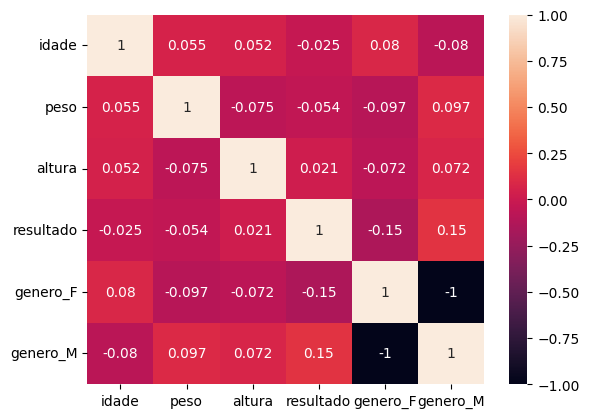

In [26]:
# Apresentar Mapa de calor com correlação entre as variáveis
sns.heatmap(df_exames.corr(), annot=True, vmin=-1, vmax=1)

<Axes: >

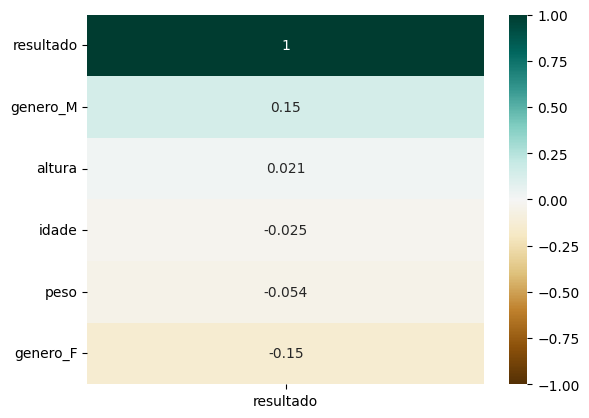

In [33]:
# Mapa de correlação só com a veriável target (resultado)
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado',
 ascending=False), annot=True, vmin=-1, vmax=1, cmap='BrBG')

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>],
       [<Axes: xlabel='idade', ylabel='resultado'>,
        <Axes: xlabel='peso', ylabel='resultado'>,


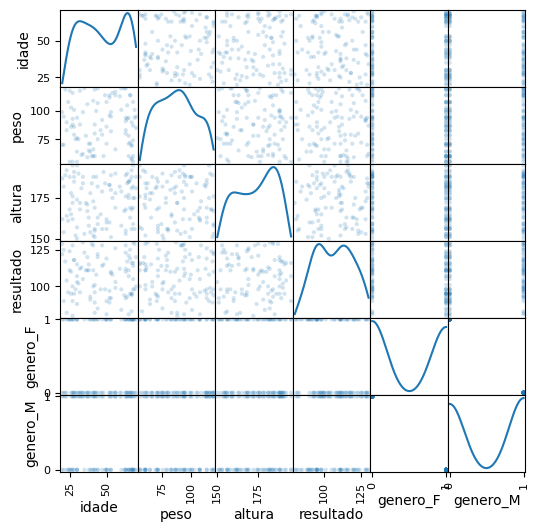

In [38]:
# Plot Scatter (Dispersão) com distribuição
pd.plotting.scatter_matrix(df_exames, figsize=(6, 6), diagonal='kde', alpha=0.2)

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>],
       [<Axes: title={'center': 'resultado'}>,
        <Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>]], dtype=object)

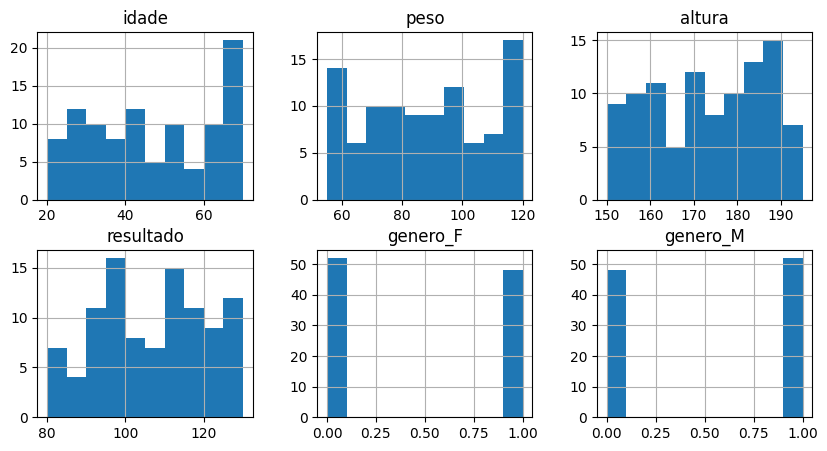

In [37]:
# Histórico de todas as variáveis
df_exames.hist(layout=(2, 3), figsize=(10, 5))